# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


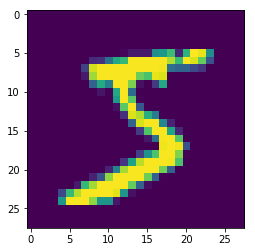

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

# first conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11

# second conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 3)) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0617 09:52:16.000678 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0617 09:52:16.033740 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 09:52:16.041268 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 16)          3472      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 24)          3480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 24)          0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0617 09:52:18.019982 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 09:52:18.077985 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0617 09:52:19.069218 140639792514944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0617 09:52:19.223448 140639792514944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 43s 712us/step - loss: 0.2127 - acc: 0.9326 - val_loss: 0.0717 - val_acc: 0.9777
Epoch 2/40
60000/60000 [==============================] - 40s 661us/step - loss: 0.0661 - acc: 0.9804 - val_loss: 0.0536 - val_acc: 0.9827
Epoch 3/40
60000/60000 [==============================] - 40s 663us/step - loss: 0.0480 - acc: 0.9853 - val_loss: 0.0408 - val_acc: 0.9882
Epoch 4/40
60000/60000 [==============================] - 40s 663us/step - loss: 0.0400 - acc: 0.9872 - val_loss: 0.0357 - val_acc: 0.9889
Epoch 5/40
60000/60000 [==============================] - 33s 555us/step - loss: 0.0324 - acc: 0.9896 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 6/40
60000/60000 [==============================] - 20s 331us/step - loss: 0.0301 - acc: 0.9903 - val_loss: 0.0362 - val_acc: 0.9894
Epoch 7/40
60000/60000 [==============================] - 23s 388us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.05222672466191166, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[2.83248643e-26 2.71281485e-28 1.54728137e-17 5.38819092e-19
  7.68169281e-25 7.91405167e-26 9.48293976e-34 1.00000000e+00
  3.17457251e-25 6.41285341e-20]
 [3.98980510e-17 1.18370919e-20 1.00000000e+00 2.30686423e-20
  2.54345647e-17 5.37402043e-29 9.25795041e-23 1.50137242e-30
  1.45467304e-14 1.66998580e-27]
 [2.13349769e-15 9.99999881e-01 1.08178588e-11 4.71740092e-15
  8.76929285e-09 1.36787855e-11 6.20384657e-13 9.18702412e-08
  2.65791729e-11 4.82341828e-14]
 [1.00000000e+00 4.41232687e-29 1.10940585e-15 1.33924958e-17
  1.55363180e-27 4.38782415e-20 5.09450759e-10 1.36178098e-20
  3.41852571e-16 4.02389893e-20]
 [1.16921840e-27 8.24866358e-28 4.23959922e-24 3.26716630e-35
  1.00000000e+00 2.47740347e-23 1.13623122e-21 2.98975027e-34
  6.44518371e-18 1.46979556e-13]
 [2.17704683e-15 9.99999881e-01 6.58239652e-12 3.28028191e-18
  1.04353459e-08 1.11427219e-12 3.42536524e-16 1.04287651e-07
  1.82236539e-12 5.67789012e-15]
 [1.06338716e-36 2.24855880e-26 7.24289958e-24 2.20478731e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

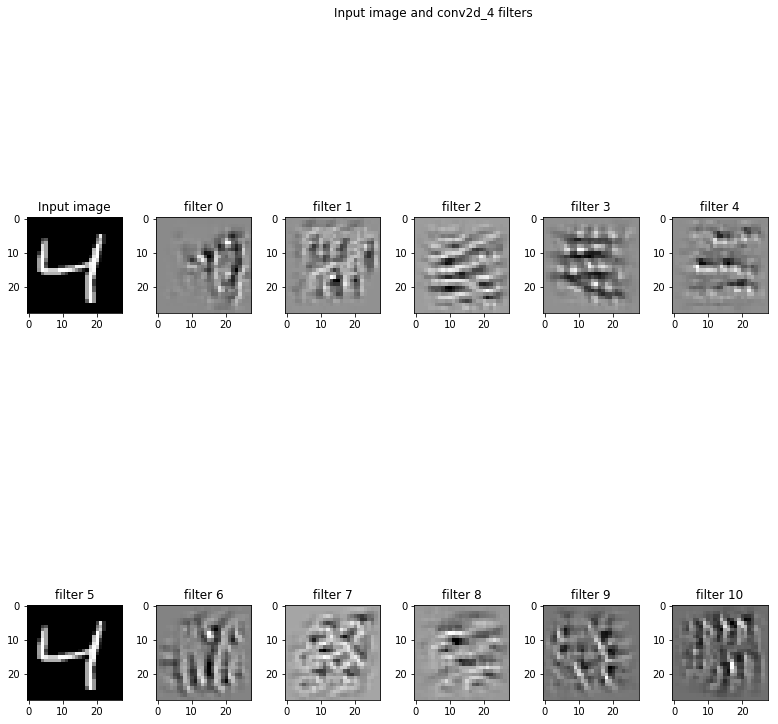

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Objective :

**Transition Layer:**
how we arrive at 'Position of Transition Layer'... In an ideal sense, it should be placed after identifying the edges & gradients, after pattens, after paths of objects etc.... I think it should go based on the receptive field; what the network has seen and then deciding where this layer should be placed... Max pooling along with 1x1 forms the transition layer. .


**Changes made:**
Our aim over the four notebooks is to make sure that we reach an accuracy of at least 99.4% with lesss than 15k parameters. Each improvement of ours will move in that direction of either reduction in number of parameters or improvement in accuracy or both.

1.   Training for 40 epochs
2.   Reduced channels per layer, we dont need so many parameters to be learnt for mnist.
3.   Add more 3x3 conv layers to remove final 7x7 conv layer. It is not recommanded to use any kernel other than 3x3 in general.


Here we managed to get a good accuracy of 99.1% with less number of parameters, due to less batch size running 32 for more epochs 40.